# Assignment 4.4

Nama : Muhammad Arsyad\
SCID : AI05113

In [ ]:
# import library yang dibutuhkan
import tensorflow as tf
import numpy as np

In [ ]:
# Siapkan data mnist
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# ubah data type menjadi float32
import numpy as np
X_train = np.array(X_train, np.float32)
X_test = np.array(X_test, np.float32)

# lakukan reshape sehingga menjadi 1-D dari 28*28
X_train = X_train.reshape([-1, 784])
X_test = X_test.reshape([-1, 784])

# lakukan normalisasi
X_train = X_train/255
X_test = X_test/255

11490434/11490434 [==============================] - 0s 0us/step


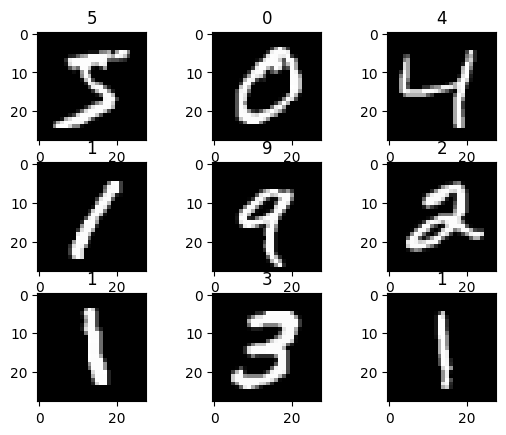

In [ ]:
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
  pyplot.title(y_train[i])
pyplot.show()

In [ ]:
# parameter data mnist
jumlah_kelas = len(np.unique(y_train))
jumlah_fitur = X_train.shape[1]
print("jumlah kelas :", jumlah_kelas)
print("jumlah fitur :", jumlah_fitur)

jumlah kelas : 10
jumlah fitur : 784


In [ ]:
# parameter pelatihan
learning_rate = 0.01
langkah_pelatihan = 3000
ukuran_batch = 256
tampilkan_langkah = 100

In [ ]:
# mengacak data dan mengupulkan dataa
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(ukuran_batch)

In [ ]:
# inisialisasi bobot dan bias
W = tf.Variable(tf.random.normal([jumlah_fitur, jumlah_kelas]), name="weight")
b = tf.Variable(tf.zeros([jumlah_kelas]), name="bias")


In [ ]:
# softmax acitvation function
def softmax(x):
  return tf.nn.softmax(tf.matmul(x, W)+b)

# cross entropy loss
def cross_entropy(y_actual, y_pred):
  y_actual = tf.one_hot(y_actual, depth=jumlah_kelas)
  y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
  return tf.reduce_mean(-tf.reduce_sum(y_actual * tf.math.log(y_pred),1))

# akurasi
def accuracy(y_actual, y_pred):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_actual, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# pengoptimalan penurunan gradien
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
# proses pengoptimalan
def run_optimization(x, y):
  with tf.GradientTape() as g:
    pred = softmax(x)
    loss = cross_entropy(y, pred)

  gradients = g.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
list_loss_val = []
list_loss_train = []
list_acc_val = []
list_acc_train = []
list_step = []

for step, (batch_x, batch_y) in enumerate(train_data.take(langkah_pelatihan), 1):
  run_optimization(batch_x, batch_y)

  if step%tampilkan_langkah == 0:
    pred_train = softmax(batch_x)
    loss_train = cross_entropy(batch_y, pred_train)
    acc_train = accuracy(batch_y, pred_train)

    pred_val = softmax(X_test)
    loss_val = cross_entropy(y_test, pred_val)
    acc_val = accuracy(y_test, pred_val)

    list_loss_val.append(loss_val.numpy())
    list_loss_train.append(loss_train.numpy())
    list_acc_val.append(acc_val.numpy())
    list_acc_train.append(acc_train.numpy())
    list_step.append(step)

    print("step : %i, loss: %f, accuracy : %f; loss val: %f, accuracy val: %f" % (step, loss_train, acc_train, loss_val, acc_val))


step : 100, loss: 8.500063, accuracy : 0.156250; loss val: 8.154449, accuracy val: 0.174200
step : 200, loss: 7.349758, accuracy : 0.148438; loss val: 7.110425, accuracy val: 0.209600
step : 300, loss: 6.147349, accuracy : 0.230469; loss val: 6.260003, accuracy val: 0.243600
step : 400, loss: 6.613193, accuracy : 0.226562; loss val: 5.567687, accuracy val: 0.285200
step : 500, loss: 4.417006, accuracy : 0.347656; loss val: 5.004132, accuracy val: 0.330100
step : 600, loss: 5.015713, accuracy : 0.343750; loss val: 4.547597, accuracy val: 0.365300
step : 700, loss: 3.919969, accuracy : 0.421875; loss val: 4.178690, accuracy val: 0.396700
step : 800, loss: 4.315046, accuracy : 0.414062; loss val: 3.870937, accuracy val: 0.425700
step : 900, loss: 3.531415, accuracy : 0.468750; loss val: 3.610760, accuracy val: 0.453800
step : 1000, loss: 3.322937, accuracy : 0.460938; loss val: 3.392891, accuracy val: 0.477000
step : 1100, loss: 3.914610, accuracy : 0.410156; loss val: 3.198644, accuracy 

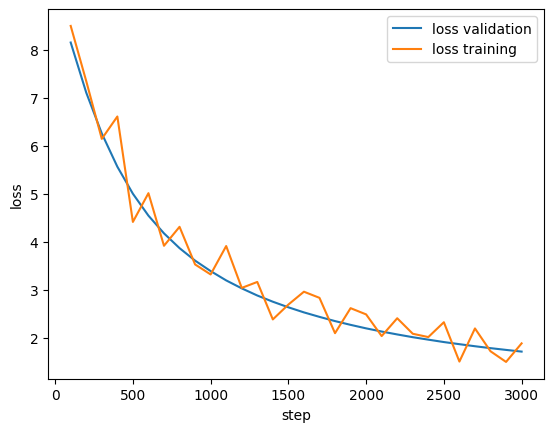

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list_step, list_loss_val, label='loss validation')
plt.plot(list_step, list_loss_train, label='loss training')
plt.legend()
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

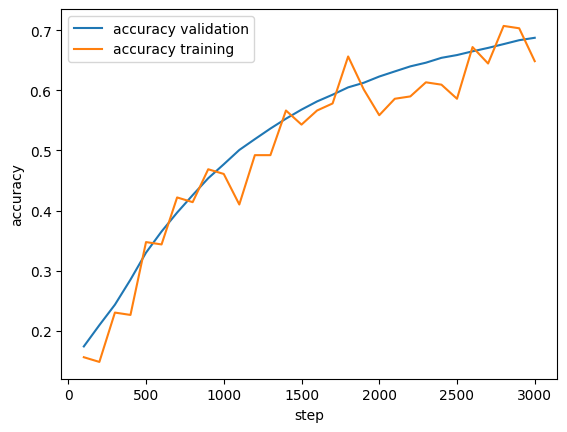

In [ ]:
plt.plot(list_step, list_acc_val, label='accuracy validation')
plt.plot(list_step, list_acc_train, label='accuracy training')
plt.legend()
plt.xlabel('step')
plt.ylabel('accuracy')
plt.show()

In [ ]:
y_pred = np.argmax(pred_val.numpy(),axis=1)
y_pred

array([7, 5, 1, ..., 9, 6, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6873

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       980
           1       0.86      0.88      0.87      1135
           2       0.72      0.69      0.70      1032
           3       0.70      0.68      0.69      1010
           4       0.62      0.61      0.62       982
           5       0.51      0.43      0.47       892
           6       0.73      0.77      0.75       958
           7       0.75      0.77      0.76      1028
           8       0.54      0.59      0.57       974
           9       0.59      0.56      0.57      1009

    accuracy                           0.69     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.69      0.69     10000



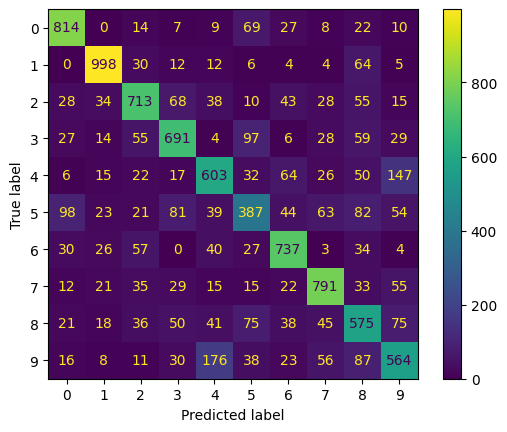

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
confusionMatrix = ConfusionMatrixDisplay(cm)
confusionMatrix.plot()

model yang dibuat kurang dapat bekerja dengan maksimal, karena akurasi hanya sekitar 0.68 atau 68%. untuk meningkatkan akurasi dilakukan dengan menambah hidden layer, mengganti fungsi optimizer.